In [1]:
import os
import glob
import ast
import json
import numpy as np
import seaborn as sns
import pandas as pd
from dance_evaluation import *
import matplotlib.pyplot as plt
import analyze_hits_pos as anlyz

In [ ]:
# OVERALL HITS PER LIMB COMBINATION

limb_combi = {"c1": ["left_wrist", "right_ankle"], "c2": ["right_wrist", "left_ankle"],
              "c3": ["left_wrist", "left_ankle"], "c4": ["right_wrist", "right_ankle"]}

for _, (hand1s_name, foot1s_name) in limb_combi.items():
    HitAnlz = anlyz.HitsAnalysis(a=60,b=180, mode="uni", norm_mode="z-score", 
                                 foot1s_name= foot1s_name , hand1s_name= hand1s_name)

    score = HitAnlz.load_files()
    print(f"Analyzing Foot = {foot1s_name}, Hand = {hand1s_name}")
    print(10*"*"+f"1-Sensor uni"+ 10*"*")
    hits_1s = HitAnlz.calc_hits( score["foot_1s_score"]["hits_idx"][3], score["hand_1s_score"]["hits_idx"][3])

    print(10*"*"+f"2-Sensor uni"+ 10*"*")
    hits_2s = HitAnlz.calc_hits( score["foot_2s_score"]["hits_idx"][3], score["hand_2s_score"]["hits_idx"][3])

    # HitAnlz.calc_totalhits(hits_1s, hits_2s) # save total hits to csv
    


In [ ]:
# GENRE WISE HITS
# hand1s_name = "right_wrist"
# foot1s_name = "right_ankle"

limb_combi = {"c1": ["left_wrist", "right_ankle"], "c2": ["right_wrist", "left_ankle"],
              "c3": ["left_wrist", "left_ankle"], "c4": ["right_wrist", "right_ankle"]}
for _, (hand1s_name, foot1s_name) in limb_combi.items():

    HitAnlz = anlyz.HitsAnalysis(a=70,b=145, mode="uni", norm_mode="z-score", 
                                foot1s_name= foot1s_name , hand1s_name= hand1s_name)

    score = HitAnlz.load_files()

    print(10*"*"+f"1-Sensor uni"+ 10*"*")
    hits_1s = HitAnlz.calc_hits( score["foot_1s_score"]["hits_idx"][3], score["hand_1s_score"]["hits_idx"][3])

    print(10*"*"+f"2-Sensor uni"+ 10*"*")
    hits_2s = HitAnlz.calc_hits( score["foot_2s_score"]["hits_idx"][3], score["hand_2s_score"]["hits_idx"][3])

    # HitAnlz.calc_genrewise_hits(hits_1s, hits_2s) # save genre wise hits to csv

### Analyze Hits from multiple sensors

In [8]:
# 1S
a = 70
b = 145
mode = "bi"
norm_mode = "z-score"

left_hand_score = pd.read_csv(f"./aist_pos1s/{norm_mode}/tempo_{a}_{b}/score/hand/left_wrist_{mode}_{a}_{b}_score.csv")
right_hand_score = pd.read_csv(f"./aist_pos1s/{norm_mode}/tempo_{a}_{b}/score/hand/right_wrist_{mode}_{a}_{b}_score.csv")

left_ankle_score = pd.read_csv(f"./aist_pos1s/{norm_mode}/tempo_{a}_{b}/score/foot/left_ankle_{mode}_{a}_{b}_score.csv")
right_ankle_score = pd.read_csv(f"./aist_pos1s/{norm_mode}/tempo_{a}_{b}/score/foot/right_ankle_{mode}_{a}_{b}_score.csv")

left_hand_score["hits_idx"] = left_hand_score["hits_idx"].apply(ast.literal_eval)   # convert string to list
right_hand_score["hits_idx"] = right_hand_score["hits_idx"].apply(ast.literal_eval)

left_ankle_score["hits_idx"] = left_ankle_score["hits_idx"].apply(ast.literal_eval)
right_ankle_score["hits_idx"] = right_ankle_score["hits_idx"].apply(ast.literal_eval)

Lh_hits_idx = set(left_hand_score.iloc[3]["hits_idx"])
Rh_hits_idx = set(right_hand_score.iloc[3]["hits_idx"])

Lf_hits_idx = set(left_ankle_score.iloc[3]["hits_idx"])
Rf_hits_idx = set(right_ankle_score.iloc[3]["hits_idx"])

all_hits_idx = set().union(*[Lh_hits_idx, Rh_hits_idx, Lf_hits_idx, Rf_hits_idx])

# print("total:", score["total"])
print("L hand hits:", len(Lh_hits_idx))
print("R hand hits:", len(Rh_hits_idx))
print("L foot hits:", len(Lf_hits_idx))
print("R foot hits:", len(Rf_hits_idx))
print("All hits:", len(all_hits_idx))

L hand hits: 472
R hand hits: 487
L foot hits: 482
R foot hits: 463
All hits: 898


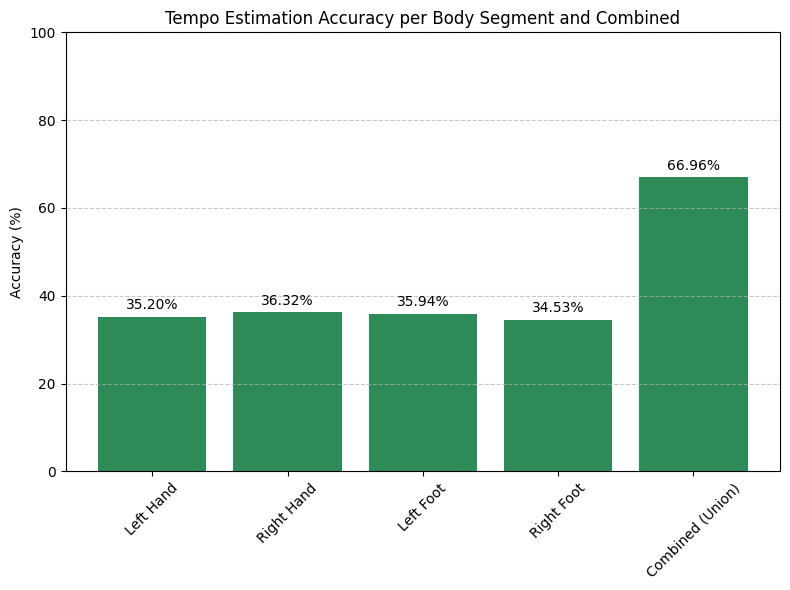

In [9]:
total_hits = 1341

# Calculate the length of each set (number of hits) and corresponding accuracy
accuracy_data = {
    "Left Hand": len(Lh_hits_idx) / total_hits * 100,
    "Right Hand": len(Rh_hits_idx) / total_hits * 100,
    "Left Foot": len(Lf_hits_idx) / total_hits * 100,
    "Right Foot": len(Rf_hits_idx) / total_hits * 100,
    "Combined (Union)": len(all_hits_idx) / total_hits * 100
}

# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(accuracy_data.keys(), accuracy_data.values(), color='seagreen')

# Add text labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom')

# Plot aesthetics
plt.ylabel("Accuracy (%)")
plt.title("Tempo Estimation Accuracy per Body Segment and Combined")
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [6]:
foot1s_name = "right_ankle"
foot_1S_df = pd.read_csv(f"./aist_pos1s/{norm_mode}/tempo_{a}_{b}/foot/{foot1s_name}_zero_{mode}_{a}_{b}.csv")

# Load genre mappings
with open("genreID_count_mapping.json", "r") as file:
    genre_Tcount = json.load(file)

with open("genre_symbols_mapping.json", "r") as file:
    genre_name = json.load(file)

# Hits index for each segment
hits_list = {
    "Lh": Lh_hits_idx,  # Left Hand
    "Rh": Rh_hits_idx,  # Right Hand
    "Lf": Lf_hits_idx,  # Left Foot
    "Rf": Rf_hits_idx,  # Right Foot
    "Combined": all_hits_idx  # Combined Union
}

# Initialize final dataframe with unique genres
final_df = pd.DataFrame(list(genre_name.items()), columns=["dance_genre", "genre"])
final_df["total"] = final_df["dance_genre"].map(genre_Tcount)

# For each body segment, calculate counts and percentages
for key, item in hits_list.items():
    hit_idx = list(item)
    hit_df = foot_1S_df.iloc[hit_idx]       # df for estimated hits
    grouped = hit_df.groupby(['dance_genre']).size().reset_index(name=f'{key}_count') # estimated count per dance genre

    # Merge counts with final dataframe
    final_df = final_df.merge(grouped, on='dance_genre', how='left')
    final_df[f'{key}_count'] = final_df[f'{key}_count'].fillna(0).astype(int)
    final_df[f'{key}_percentage'] = round((final_df[f'{key}_count'] / final_df['total']) * 100, 2)

# Drop unnecessary columns and reorder
final_df = final_df.drop(columns=["dance_genre"])
final_df = final_df[['genre'] + [f'{k}_{m}' for k in hits_list.keys() for m in ["count", "percentage"]]]

# # Preview final dataframe
# print(final_df)


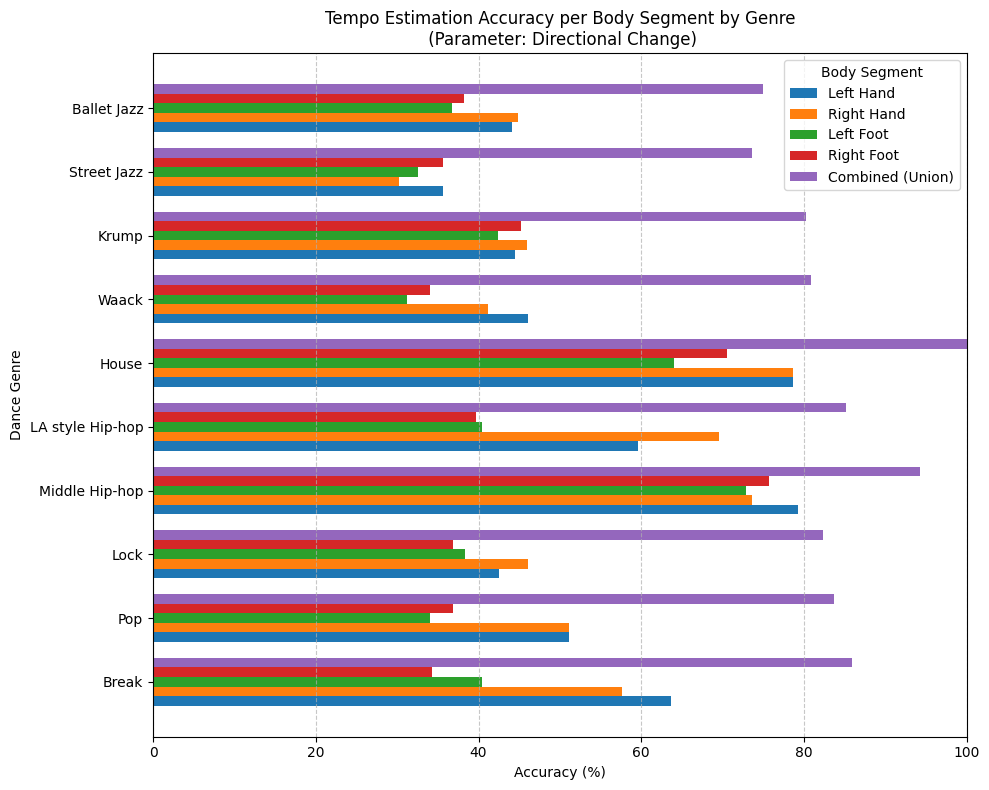

In [16]:
# Define body segments for plotting
segments = ["Lh_percentage", "Rh_percentage", "Lf_percentage", "Rf_percentage", "Combined_percentage"]
segment_labels = ["Left Hand", "Right Hand", "Left Foot", "Right Foot", "Combined (Union)"]

# Set plot parameters
genres = final_df["genre"].tolist()
y = np.arange(len(genres))  # the label locations
height = 0.15  # the height of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot each segment as a group (horizontal)
for i, segment in enumerate(segments):
    ax.barh(y + i * height, final_df[segment], height, label=segment_labels[i])

# Add labels, title, and legend
ax.set_xlabel('Accuracy (%)')
ax.set_ylabel('Dance Genre')
ax.set_title('Tempo Estimation Accuracy per Body Segment by Genre\n (Parameter: Directional Change)')
ax.set_yticks(y + height * (len(segments) - 1) / 2)
ax.set_yticklabels(genres)
ax.set_xlim(0, 100)
ax.legend(title="Body Segment", loc='upper right')

# Add grid and data labels on bars
ax.grid(axis='x', linestyle='--', alpha=0.7)
# for bar_group in ax.containers:
#     ax.bar_label(bar_group, fmt='%.1f%%', padding=3)

plt.tight_layout()
plt.show()

### Plot Genre Wise Hits (Pairwise)

In [ ]:
a = 70; b = 145
mode = "uni"
norm_mode = "z-score"

# titles = {"combined": "Combined (Hand+Foot) Hits", 
#           "handfoot_1S": "1 Hand Sensor hits & 1 Foot Sensor hits",
#           "handfoot_2S": "2 Hand Sensors (merged) hits & 2 Foot Sensor (merged) hits"}

# legends = {"combined": ["1 Hand Sensor + 1 Foot Sensor ", "2 Hand Sensor (merged) + 2 Foot Sensor (merged)"], 
#            "handfoot_1S": ["1 Hand Sensor", "1 Foot Sensor"],
#            "handfoot_2S": ["2 Hand Sensor (merged)", "2 Foot Sensor (merged)"]}

titles = {
    "both_hand_foot_2S": "Both Wrists Sensors (merged) & Both Ankles Sensors (merged)",

    "combined_left_wrist_left_ankle": "Left Wrist Sensor + Left Ankle Sensor",
    "combined_left_wrist_right_ankle": "Left Wrist Sensor + Right Ankle Sensor",
    "combined_right_wrist_left_ankle": "Right Wrist Sensor + Left Ankle Sensor",
    "combined_right_wrist_right_ankle": "Right Wrist Sensor + Right Ankle Sensor",
    
    "left_wrist_left_ankle_1S": "Left Wrist Sensor & Left Ankle Sensor",
    "right_wrist_left_ankle_1S": "Right Wrist Sensor & Left Ankle Sensor",
    "left_wrist_right_ankle_1S": "Left Wrist Sensor & Right Ankle Sensor",
    "right_wrist_right_ankle_1S": "Right Wrist Sensor & Right Ankle Sensor",
}


legends = {
    "both_hand_foot_2S": ["Both Wrists Sensors (merged)", "Both Ankles Sensors (merged)"],

    "combined_left_wrist_left_ankle": ["Left Wrist Sensor + Left Ankle Sensor", "Both Wrists Sensors (merged) + Both Ankles Sensors (merged)"],
    "combined_left_wrist_right_ankle": ["Left Wrist Sensor + Right Ankle Sensor", "Both Wrists Sensors (merged) + Both Ankles Sensors (merged)"],
    "combined_right_wrist_left_ankle": ["Right Wrist Sensor + Left Ankle Sensor", "Both Wrists Sensors (merged) + Both Ankles Sensors (merged)"],
    "combined_right_wrist_right_ankle": ["Right Wrist Sensor + Right Ankle Sensor", "Both Wrists Sensors (merged) + Both Ankles Sensors (merged)"],
    
    "left_wrist_left_ankle_1S": ["Left Wrist Sensor", "Left Ankle Sensor"],
    "right_wrist_left_ankle_1S": ["Right Wrist Sensor", "Left Ankle Sensor"],
    "left_wrist_right_ankle_1S": ["Left Wrist Sensor", "Right Ankle Sensor"],
    "right_wrist_right_ankle_1S": ["Right Wrist Sensor", "Right Ankle Sensor"]
}




f_path = glob.glob(f"./stats/{norm_mode}/tempo_{a}_{b}/{mode}/genre_wise/*.csv", )

for path in f_path:
    label_key = os.path.basename(path).split("_genrewise")[0]
    fname = os.path.basename(path).split(".")[0]
    
    df = pd.read_csv(path)
    df_long = pd.concat([
        df[['Agenre_name', 'Apercentage']].rename(columns={'Agenre_name': 'Genre', 'Apercentage': 'Acc1 Percentage'}).assign(Method=f'{legends[label_key][0]}'),
        df[['Bgenre_name', 'Bpercentage']].rename(columns={'Bgenre_name': 'Genre', 'Bpercentage': 'Acc1 Percentage'}).assign(Method=f'{legends[label_key][1]}')
    ])

    plt.figure(figsize=(12, 8))
    sns.barplot(data=df_long, x="Acc1 Percentage", y="Genre", hue="Method", orient="h")

    plt.xlabel("Percentage of Hits (%)")
    plt.ylabel("Dance Genre")
    plt.title(f"Hits Across Dance Genres ({norm_mode}, {mode}-directional)\n {titles[label_key]}")
    plt.legend(title="", prop={'size': 9}, markerscale=0.8, handlelength=1)

    plt.grid(axis='x', linestyle="--", alpha=0.7, which='both')
    plt.minorticks_on()
    plt.xticks(np.arange(0, 100+1, 10))

    plt.savefig(f"./stats/{norm_mode}/tempo_{a}_{b}/{mode}/genre_wise/{fname}.png", dpi=300)
    plt.show()

In [ ]:
# mode = "uni"
# a = 70; b = 145
# hand1s_name = "right_wrist"
# foot1s_name = "left_ankle"
# side_hand = hand1s_name.split("_")[0].capitalize()
# side_foot = foot1s_name.split("_")[0].capitalize()

# norm_mode = "z-score"

# foot_1S_df = pd.read_csv(f"./aist_pos1s/{norm_mode}/tempo_{a}_{b}/foot/{foot1s_name}_zero_{mode}_{a}_{b}.csv")
# foot_2S_df = pd.read_csv(f"./aist_pos2s/{norm_mode}/tempo_{a}_{b}/foot/foot_zero_{mode}_{a}_{b}.csv")

# foot_1s_score = pd.read_csv(f"./aist_pos1s/{norm_mode}/tempo_{a}_{b}/score/foot/{foot1s_name}_{mode}_{a}_{b}_score.csv")
# hand_1s_score = pd.read_csv(f"./aist_pos1s/{norm_mode}/tempo_{a}_{b}/score/hand/{hand1s_name}_{mode}_{a}_{b}_score.csv")

# foot_2s_score = pd.read_csv(f"./aist_pos2s/{norm_mode}/tempo_{a}_{b}/score/foot/foot_{mode}_{a}_{b}_score.csv")
# hand_2s_score = pd.read_csv(f"./aist_pos2s/{norm_mode}/tempo_{a}_{b}/score/hand/hand_{mode}_{a}_{b}_score.csv")

# foot_1s_score["hits_idx"] = foot_1s_score["hits_idx"].apply(ast.literal_eval)   # convert string to list
# hand_1s_score["hits_idx"] = hand_1s_score["hits_idx"].apply(ast.literal_eval)

# foot_2s_score["hits_idx"] = foot_2s_score["hits_idx"].apply(ast.literal_eval)
# hand_2s_score["hits_idx"] = hand_2s_score["hits_idx"].apply(ast.literal_eval)

# total = foot_2S_df.shape[0]

# # genre id and total count mapping
# json_filename = "genreID_count_mapping.json"
# with open(json_filename, "r") as file:
#     genre_Tcount = json.load(file)
    
# # genre id and name mapping
# json_filename = "genre_symbols_mapping.json"
# with open(json_filename, "r") as file:
#     genre_name = json.load(file)  

In [ ]:
# def calc_hits(foot_score, hand_score):

#     foot_hits = set(foot_score)
#     hand_hits = set(hand_score)
#     combined_hits = foot_hits.union(hand_hits)
#     common_hits = foot_hits.intersection(hand_hits)
#     foot_only_hits = len(foot_hits)-len(common_hits)
#     hand_only_hits = len(hand_hits)-len(common_hits)
    
#     print("total:", total)
#     print("foot hits:", len(foot_hits), f"({round(len(foot_hits)*100/total, 2)} %)" )
#     print("hand hits:", len(hand_hits), f"({round(len(hand_hits)*100/total, 2)} %)" )
#     print("combined hits:", len(combined_hits), f"({round(len(combined_hits)*100/total, 2)} %)" )
#     print("common hits:", len(common_hits))
#     print("foot - common:", foot_only_hits)
#     print("hand - common:", hand_only_hits)
    
#     return foot_hits, hand_hits, combined_hits, common_hits, foot_only_hits, hand_only_hits

# print(10*"*"+f"1-Sensor {mode}"+ 10*"*")
# foot1S_hits, hand1S_hits, combined1S_hits, common1S_hits, foot_only1S_hits, hand_only1S_hits = calc_hits(foot_1s_score["hits_idx"][3], hand_1s_score["hits_idx"][3])

# print(10*"*"+f"2-Sensor {mode}"+ 10*"*")
# foot2S_hits, hand2S_hits, combined2S_hits, common2S_hits, foot_only2S_hits, hand_only2S_hits = calc_hits(foot_2s_score["hits_idx"][3], hand_2s_score["hits_idx"][3])

In [ ]:
# # Define hit counts
# hit_counts = {
#     "total": total,
#     "foot1S_hits": len(foot1S_hits),
#     "hand1S_hits": len(hand1S_hits),
#     "combined1S_hits": len(combined1S_hits),
#     "common1S_hits": len(common1S_hits),
#     # "foot_only1S_hits": foot_only1S_hits,   # foot - common hits
#     # "hand_only1S_hits": hand_only1S_hits,   # hand - common hits
    
#     "foot2S_hits": len(foot2S_hits),
#     "hand2S_hits": len(hand2S_hits),
#     "combined2S_hits": len(combined2S_hits),
#     "common2S_hits": len(common2S_hits),
#     # "foot_only2S_hits": (foot_only2S_hits),
#     # "hand_only2S_hits": hand_only2S_hits,
# }

# hit_data = [{"hit_type": key, "hit": value} for key, value in hit_counts.items() if key != "total"]
# hit_total = pd.DataFrame(hit_data)
# hit_total["percentage"] = round((hit_total["hit"] / hit_counts["total"]) * 100, 2)
# hit_total["method"] = hit_total["hit_type"].apply(lambda x: "1S" if "1S" in x else "2S")

# # Add 'label' column based on 'hit_type'
# hit_total["label"] = hit_total["hit_type"].apply(
#     lambda x: f"{side_foot} Foot" if x == "foot1S_hits" else
#               f"{side_hand} Hand" if x == "hand1S_hits" else
#               f"{side_hand} Hand+{side_foot} Foot" if x == "combined1S_hits" else
#               "Mutual" if x == "common1S_hits" else
#               "Both Feet" if x == "foot2S_hits" else
#               "Both Hand" if x == "hand2S_hits" else
#               "Both Hand+Foot" if x == "combined2S_hits" else
#               "Mutual"  # For common2S_hits
# )
# # Reorder columns
# hit_total = hit_total[["hit_type", "label", "hit", "percentage", "method"]]
# hit_total.to_csv(f"./stats/{norm_mode}/tempo_{a}_{b}/{mode}/hits_total/{hand1s_name}_{foot1s_name}.csv", index=False)

# # hit_total = pd.read_csv(f"./stats/tempo_{a}_{b}/{mode}/hits_total/left_wrist_left_ankle.csv")

# plt.figure(figsize=(6, 4))
# sns.barplot(data=hit_total, x="percentage", y="label",hue="method", orient="h",)

# # Formatting
# plt.xlabel("Percentage of Hits (%)")
# plt.ylabel("")
# plt.title(f"Hit Detection Overview ({a}, {b})\n")
# plt.legend(title="Sensor")
# plt.grid(axis='x', linestyle="--", alpha=0.7, which='both')
# plt.xticks(np.arange(0, 100+1, 10))

# # plt.savefig("./stats/total_hits.png")
# plt.show()

In [ ]:
# # mode = "uni"
# # a = 60; b = 180

# config_hits = {
#     "combined_1S_2S": {
#         "L1": [combined1S_hits, combined2S_hits],
#         "para": ["combined_hits_1S", "combined_hits_2S", f"./stats/{norm_mode}/tempo_{a}_{b}/{mode}/genre_wise/combined_genrewise_hits"]
#     },
#     "hand_1S": {
#         "L1": [hand1S_hits, foot1S_hits],
#         "para": ["hand_hits_1S", "foot_hits_1S", f"./stats/{norm_mode}/tempo_{a}_{b}/{mode}/genre_wise/handfoot_1S_genrewise_hits"]
#     },
#     "hand_2S": {
#         "L1": [hand2S_hits, foot2S_hits],
#         "para": ["hand_hits_2S", "foot_hits_2S", f"./stats/{norm_mode}/tempo_{a}_{b}/{mode}/genre_wise/handfoot_2S_genrewise_hits"]
#     }
# }

# # Loop through each configuration
# for key, cfg in config_hits.items():
#     L1 = cfg["L1"]
#     para = cfg["para"]

#     column_names = ["Agenre_name", f"A{para[0]}", "Atotal", "Apercentage",
#                     "Bgenre_name", f"B{para[1]}", "Btotal", "Bpercentage"]

#     df_list = []
#     for item in L1:
#         hit_idx = list(item)
#         hit_df = foot_1S_df.iloc[hit_idx]  # Ensure foot_1S_df is defined
#         grouped = hit_df.groupby(['dance_genre']).size().reset_index(name='count')

#         # Add total and percentage columns
#         grouped['total'] = grouped['dance_genre'].map(genre_Tcount)
#         grouped['percentage'] = round((grouped['count'] / grouped['total']) * 100, 2)
#         grouped['genre_name'] = grouped['dance_genre'].map(genre_name)

#         # Keep only relevant columns
#         grouped = grouped[['genre_name', 'count', 'total', 'percentage']]
#         df_list.append(grouped)

#     # Concatenate and save final dataframe
#     final_df = pd.concat(df_list, axis=1)
#     final_df.columns = column_names
#     final_df.to_csv(para[2] + ".csv", index=False)

#     print(f"Saved CSV for {key}: {para[2]}.csv ✅")
